In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/fibe hackathon/dataset/train.csv')

In [ ]:
df.head()

,id,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_5470,var_5471,var_5472,var_5473,var_5474,var_5475,var_5476,var_5477,var_5478,target
0,id_1,0.015625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.355422,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,id_2,0.187500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.150602,...,0.0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0
2,id_3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,0.008333,NaN,NaN,0.0,NaN,NaN,0.0,0
3,id_4,0.156250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,id_5,0.046875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.096386,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
df.shape

(25000, 5480)

In [ ]:
df=df.drop('id',axis=1)

In [ ]:
import numpy as np
print(np.any(np.isnan(df)))
print(np.any(np.isinf(df)))

True
True


In [ ]:
# dataset contains high extreme or low extreme values
# replacing infinity values with some large value or small values
df.replace([np.inf,-np.inf],-1e9,inplace=True)

In [ ]:
print(np.any(np.isinf(df))) 

False


In [ ]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})
missing_value_df = missing_value_df.sort_values('percent_missing', ascending=False)
missing_value_df

,column_name,percent_missing
var_2834,var_2834,100.0
var_2908,var_2908,100.0
var_3893,var_3893,100.0
var_3894,var_3894,100.0
var_636,var_636,100.0
...,...,...
var_5290,var_5290,0.0
var_5291,var_5291,0.0
var_5292,var_5292,0.0
var_5293,var_5293,0.0


In [ ]:
mxmiss=missing_value_df[missing_value_df['percent_missing']>=80.0]

In [ ]:
mxmiss.shape

(1861, 2)

In [ ]:
# so we've 1861 attributes which have more than 80 percent missing values, we need to drop them out
row_index=mxmiss.index
row_index=list(row_index)
df=df.drop(row_index,axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Columns: 3618 entries, var_1 to target
dtypes: float64(3617), int64(1)
memory usage: 690.1 MB


In [ ]:
# now we've removed  coloumns which have more than 80% missing values

In [ ]:
df.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_5457,var_5458,var_5460,var_5461,var_5462,var_5463,var_5464,var_5466,var_5472,target
0,0.015625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.355422,0.106633,...,0.012270,0.008547,0.016317,NaN,NaN,0.000000,NaN,0.000000,NaN,0
1,0.187500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.150602,0.106633,...,0.055215,0.145299,0.109557,NaN,0.067114,0.049020,0.073684,0.062992,0.000000,0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,0.079755,NaN,0.065268,0.026316,0.020134,0.068627,NaN,0.036745,0.008333,0
3,0.156250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018072,0.106633,...,NaN,NaN,0.006993,NaN,0.000000,NaN,NaN,0.000000,NaN,0
4,0.046875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.096386,0.106633,...,0.042945,NaN,0.055944,0.000000,NaN,0.009804,NaN,0.005249,NaN,0


In [ ]:
print(np.any(np.isnan(df))) # true indicates it has nan values

True


In [ ]:
dff=df.iloc[:,:-1]
dff
y=df.iloc[:,-1]

In [ ]:
dff.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_5456,var_5457,var_5458,var_5460,var_5461,var_5462,var_5463,var_5464,var_5466,var_5472
0,0.015625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.355422,0.106633,...,0.011905,0.012270,0.008547,0.016317,NaN,NaN,0.000000,NaN,0.000000,NaN
1,0.187500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.150602,0.106633,...,0.107143,0.055215,0.145299,0.109557,NaN,0.067114,0.049020,0.073684,0.062992,0.000000
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,0.047619,0.079755,NaN,0.065268,0.026316,0.020134,0.068627,NaN,0.036745,0.008333
3,0.156250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018072,0.106633,...,0.005952,NaN,NaN,0.006993,NaN,0.000000,NaN,NaN,0.000000,NaN
4,0.046875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.096386,0.106633,...,0.017857,0.042945,NaN,0.055944,0.000000,NaN,0.009804,NaN,0.005249,NaN


In [ ]:
dff.to_csv('data.csv')

In [ ]:
import dask.dataframe as dd 
df_da=dd.read_csv('data.csv') # reading the dataframe as dask_dataframe to make it into chunks and preprocessing ( any process ) will be easy

In [ ]:
def dd(df):
  df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
  return df
df_da=dd(df_da)

In [ ]:
df_da.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_5456,var_5457,var_5458,var_5460,var_5461,var_5462,var_5463,var_5464,var_5466,var_5472
0,0.015625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.355422,0.106633,...,0.011905,0.012270,0.008547,0.016317,NaN,NaN,0.000000,NaN,0.000000,NaN
1,0.187500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.150602,0.106633,...,0.107143,0.055215,0.145299,0.109557,NaN,0.067114,0.049020,0.073684,0.062992,0.000000
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,0.047619,0.079755,NaN,0.065268,0.026316,0.020134,0.068627,NaN,0.036745,0.008333
3,0.156250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018072,0.106633,...,0.005952,NaN,NaN,0.006993,NaN,0.000000,NaN,NaN,0.000000,NaN
4,0.046875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.096386,0.106633,...,0.017857,0.042945,NaN,0.055944,0.000000,NaN,0.009804,NaN,0.005249,NaN


In [ ]:
# converting into numpy array
def mgen(df):
  data=df.values
  return data
df_dask1=mgen(df_da)

In [ ]:
df_dask1

dask.array<values, shape=(nan, 3617), dtype=float64, chunksize=(nan, 3617), chunktype=numpy.ndarray>

In [ ]:
# replacing all nan values with zero
df_dask1[np.isnan(df_dask1)]=0

In [ ]:
type(df_dask1)

dask.array.core.Array

In [ ]:
def col(df):
  columns=df.columns
  return columns
columns=col(df_da)

In [ ]:
len(columns)

3617

In [ ]:
# standardizing the data ( scaling the data )
from sklearn.preprocessing import MinMaxScaler
def minmax(df_df):
  global scaler
  scaler=MinMaxScaler()
  dd=scaler.fit_transform(df_df)
  return dd
data_scaled=minmax(df_dask1)

/usr/local/lib/python3.9/dist-packages/dask/array/core.py:1712: FutureWarning: The `numpy.may_share_memory` function is not implemented by Dask array. You may want to use the da.map_blocks function or something similar to silence this warning. Your code may stop working in a future release.
  warnings.warn(


In [ ]:
data_scaled

array([[0.015625  , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.1875    , 0.        , 0.        , ..., 0.07368421, 0.06299213,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.03674541,
        0.00833333],
       ...,
       [0.046875  , 0.        , 0.        , ..., 0.        , 0.01312336,
        0.        ],
       [0.125     , 0.        , 0.        , ..., 0.02105263, 0.05511811,
        0.        ],
       [0.03125   , 0.        , 0.        , ..., 0.        , 0.00262467,
        0.        ]])

In [ ]:
data_scaled.shape[1]

3617

In [ ]:
"""
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

n_components = (data_scaled.shape[1])
svd = TruncatedSVD(n_components=n_components)
svd.fit_transform(data_scaled) 
explained_var_ratio = svd.explained_variance_ratio_
plt.plot(np.cumsum(explained_var_ratio))
plt.show()
"""

'\nfrom sklearn.decomposition import TruncatedSVD\nimport matplotlib.pyplot as plt\n\nn_components = (data_scaled.shape[1])\nsvd = TruncatedSVD(n_components=n_components)\nsvd.fit_transform(data_scaled) \nexplained_var_ratio = svd.explained_variance_ratio_\nplt.plot(np.cumsum(explained_var_ratio))\nplt.show()\n'

In [ ]:
# as we can observe from the above scree plot the elbow taking place at the range(0-500)
# take n_components as 500

In [ ]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=500)
data_imputed=svd.fit_transform(data_scaled)

In [ ]:
data_imputed.shape

(25000, 500)

In [ ]:
svd.components_.shape

(500, 3617)

In [ ]:
data_imp=np.dot(data_imputed,svd.components_)

In [ ]:
data_imp.shape

(25000, 3617)

In [ ]:
# descaling the data
final_data=scaler.inverse_transform(data_imp)

In [ ]:
final_data

array([[ 0.01666612, -0.01621666, -0.00726016, ..., -0.00402654,
         0.00086875,  0.00064487],
       [ 0.18847001, -0.00689684,  0.00511681, ...,  0.08274073,
         0.06639557,  0.00048274],
       [-0.00095246,  0.00094641,  0.02976675, ..., -0.01366746,
         0.0265663 ,  0.00880043],
       ...,
       [ 0.04645136,  0.00076673,  0.00206817, ...,  0.00643746,
         0.00887417, -0.0004267 ],
       [ 0.12518829,  0.00157765,  0.00393965, ...,  0.02396815,
         0.05372425,  0.00046631],
       [ 0.03131244,  0.00166124,  0.00144633, ..., -0.00079276,
         0.00479039, -0.00103864]])

In [ ]:
final_data.shape

(25000, 3617)

In [ ]:
# converting it into a dataframe
final_dataframe=pd.DataFrame(final_data,columns=columns)

In [ ]:
final_dataframe.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_5456,var_5457,var_5458,var_5460,var_5461,var_5462,var_5463,var_5464,var_5466,var_5472
0,0.016666,-0.016217,-0.007260,-0.001167,-0.001961,-9.780475e-17,0.000843,0.007113,0.355386,0.108867,...,0.012301,0.012169,0.009907,0.016239,0.001024,0.000627,-0.002544,-0.004027,0.000869,0.000645
1,0.188470,-0.006897,0.005117,-0.000869,0.001939,-2.453666e-16,0.000570,0.001909,0.151031,0.101638,...,0.111292,0.055825,0.134673,0.108834,0.005527,0.064554,0.042783,0.082741,0.066396,0.000483
2,-0.000952,0.000946,0.029767,-0.004795,0.016556,-3.150533e-17,-0.003638,0.000341,0.000603,0.008201,...,0.014900,0.119798,-0.001963,0.069309,0.014189,0.003953,0.086448,-0.013667,0.026566,0.008800
3,0.155828,0.001101,-0.004035,0.000356,0.001636,2.148918e-16,-0.000312,-0.001120,0.018491,0.104389,...,0.008845,-0.000743,-0.002091,0.006790,0.002196,-0.001494,-0.001098,0.001895,0.002471,0.000407
4,0.046477,-0.001981,0.000351,-0.001402,0.001498,-6.211793e-17,0.001565,0.000503,0.096011,0.106249,...,0.026887,0.046859,0.010151,0.059255,0.013718,-0.008039,0.005160,-0.005146,0.003147,-0.001686


In [ ]:
class_distribution=pd.value_counts(y,normalize=True)
print(class_distribution) # therefore, the dataset is imbalanced

0    0.85316
1    0.14684
Name: target, dtype: float64


In [ ]:
# we perform undersampling to reduce the instances in the majority class to class distribution
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(final_dataframe, y)

In [ ]:
X_resampled.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_5456,var_5457,var_5458,var_5460,var_5461,var_5462,var_5463,var_5464,var_5466,var_5472
0,-0.000242,-0.000504,0.000937,-0.000179,-0.000239,-4.692099e-16,0.000031,0.000058,-0.000129,-0.000919,...,0.001868,0.003062,0.018164,0.012201,0.000078,-0.000333,0.002837,0.003925,0.005733,0.000483
1,0.030817,-0.000121,0.001885,0.001575,-0.000739,3.879722e-16,-0.000998,-0.000418,0.036543,0.108225,...,0.005817,0.000651,0.000150,0.009398,-0.004493,-0.002686,0.002093,0.001893,0.001182,-0.000228
2,0.062262,-0.002594,-0.001266,-0.001123,0.004920,7.817878e-17,0.000470,0.001063,0.024425,0.108599,...,0.000713,0.000380,0.002324,0.007113,0.000782,-0.002142,-0.003816,-0.000399,0.002233,0.000221
3,0.000594,-0.003848,-0.007782,-0.002704,0.002649,-4.418052e-16,-0.010762,-0.000077,0.001563,0.004880,...,0.108113,0.084556,0.048307,0.110570,0.033878,0.061751,0.034311,-0.003087,0.048318,0.011673
4,0.000036,-0.000418,-0.000014,0.000483,-0.000211,-2.033770e-16,-0.000055,0.000129,0.000040,-0.000251,...,-0.000872,0.002851,0.002718,0.008183,-0.001531,-0.001715,0.000108,-0.002475,0.002193,-0.000429


In [ ]:
class_distribution1=pd.value_counts(y_resampled,normalize=True)
print(class_distribution1) # therefore, the dataset is balanced

0    0.5
1    0.5
Name: target, dtype: float64


In [ ]:
print(np.any(np.isnan(X_resampled))) # no nan values

False


In [ ]:
df_test=pd.read_csv('/content/drive/MyDrive/fibe hackathon/dataset/test.csv')
df_test.head()

,id,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_5469,var_5470,var_5471,var_5472,var_5473,var_5474,var_5475,var_5476,var_5477,var_5478
0,id_1,0.015625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018072,...,NaN,0.035714,NaN,0.0125,NaN,NaN,NaN,NaN,NaN,NaN
1,id_2,0.015625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,id_3,0.015625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012048,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,id_4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,id_5,0.046875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_test=df_test.drop('id',axis=1)

In [ ]:
df_test.replace([np.inf,-np.inf],-1e9,inplace=True)

In [ ]:
print(np.any(np.isinf(df_test)))

False


In [ ]:
import numpy as np

In [ ]:
percent_missing_test1 = df_test.isnull().sum() * 100 / len(df_test)
missing_value_df_test1 = pd.DataFrame({'column_name': df_test.columns,'percent_missing': percent_missing_test1})
missing_value_df_test2= missing_value_df_test1.sort_values('percent_missing', ascending=False)
missing_value_df_test2

,column_name,percent_missing
var_1586,var_1586,100.0
var_1141,var_1141,100.0
var_3161,var_3161,100.0
var_3160,var_3160,100.0
var_1137,var_1137,100.0
...,...,...
var_4389,var_4389,0.0
var_4390,var_4390,0.0
var_4391,var_4391,0.0
var_4392,var_4392,0.0


In [ ]:
mxmiss_test1=missing_value_df_test1[missing_value_df_test1['percent_missing']>=80.0]

In [ ]:
mxmiss_test1

,column_name,percent_missing
var_11,var_11,94.28
var_12,var_12,80.54
var_15,var_15,94.28
var_16,var_16,80.54
var_19,var_19,94.66
...,...,...
var_5474,var_5474,95.64
var_5475,var_5475,95.72
var_5476,var_5476,97.32
var_5477,var_5477,99.98


In [ ]:
mxmiss_test1.shape

(1869, 2)

In [ ]:
row_index_test=mxmiss_test1.index
row_index_test=list(row_index_test)
df_test=df_test.drop(row_index_test,axis=1) 

In [ ]:
df_test.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_5456,var_5457,var_5458,var_5460,var_5461,var_5462,var_5463,var_5464,var_5466,var_5472
0,0.015625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018072,0.128426,...,0.059524,0.036810,0.068376,0.079254,0.052632,0.046980,0.049020,0.084211,0.070866,0.0125
1,0.015625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018072,0.111644,...,0.041667,0.055215,NaN,0.069930,0.105263,0.026846,0.029412,NaN,0.044619,NaN
2,0.015625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012048,0.106633,...,0.017857,0.049080,0.000000,0.037296,NaN,0.000000,0.029412,NaN,0.010499,NaN
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,0.029762,NaN,NaN,0.020979,0.026316,0.020134,NaN,NaN,0.015748,NaN
4,0.046875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.106633,...,0.011905,0.006135,NaN,0.011655,NaN,NaN,0.000000,NaN,0.000000,NaN


In [ ]:
print(np.any(np.isinf(df_test)))
print(np.any(np.isnan(df_test)))

False
True


In [ ]:
df_test.to_csv('df_test.csv')

In [ ]:
import dask.dataframe as dd

In [ ]:
df_test_dd=dd.read_csv('df_test.csv')

In [ ]:
df_test_dd.head()

,Unnamed: 0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_5456,var_5457,var_5458,var_5460,var_5461,var_5462,var_5463,var_5464,var_5466,var_5472
0,0,0.015625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018072,...,0.059524,0.036810,0.068376,0.079254,0.052632,0.046980,0.049020,0.084211,0.070866,0.0125
1,1,0.015625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018072,...,0.041667,0.055215,NaN,0.069930,0.105263,0.026846,0.029412,NaN,0.044619,NaN
2,2,0.015625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012048,...,0.017857,0.049080,0.000000,0.037296,NaN,0.000000,0.029412,NaN,0.010499,NaN
3,3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,0.029762,NaN,NaN,0.020979,0.026316,0.020134,NaN,NaN,0.015748,NaN
4,4,0.046875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,0.011905,0.006135,NaN,0.011655,NaN,NaN,0.000000,NaN,0.000000,NaN


In [ ]:
def dd(df):
  df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
  return df
df_daa=dd(df_test_dd)

In [ ]:
# converting into numpy array
def mgen(df):
  data=df.values
  return data
df_dask2=mgen(df_daa)

In [ ]:
# replacing all nan values with zero
df_dask2[np.isnan(df_dask2)]=0

In [ ]:
type(df_dask2)

dask.array.core.Array

In [ ]:
def col(df):
  columns=df.columns
  return columns
columns1=col(df_daa)

In [ ]:
len(columns1)

3609

In [ ]:
# standardizing the data ( scaling the data )
from sklearn.preprocessing import MinMaxScaler
def minmax(df_df):
  global scaler
  scaler=MinMaxScaler()
  dd=scaler.fit_transform(df_df)
  return dd
data_scaled1=minmax(df_dask2)

/usr/local/lib/python3.9/dist-packages/dask/array/core.py:1712: FutureWarning: The `numpy.may_share_memory` function is not implemented by Dask array. You may want to use the da.map_blocks function or something similar to silence this warning. Your code may stop working in a future release.
  warnings.warn(


In [ ]:
data_scaled1

array([[0.01754386, 0.        , 0.        , ..., 0.06956522, 0.06835443,
        0.02830189],
       [0.01754386, 0.        , 0.        , ..., 0.        , 0.04303797,
        0.        ],
       [0.01754386, 0.        , 0.        , ..., 0.        , 0.01012658,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.00253165,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.0173913 , 0.03544304,
        0.00943396],
       [0.        , 0.        , 0.        , ..., 0.        , 0.01518987,
        0.        ]])

In [ ]:
data_scaled1.shape[1]

3609

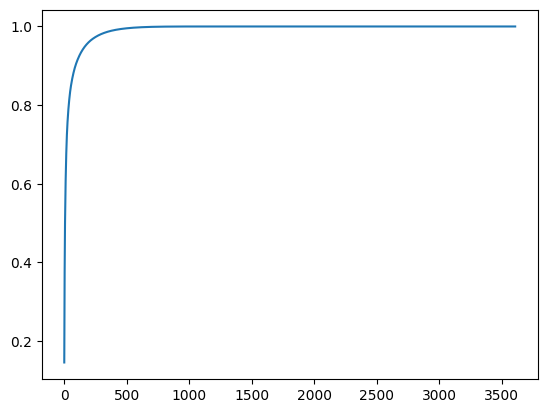

In [ ]:
"""
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

n_components = (data_scaled1.shape[1])
svd = TruncatedSVD(n_components=n_components)
svd.fit_transform(data_scaled1) 
explained_var_ratio = svd.explained_variance_ratio_
plt.plot(np.cumsum(explained_var_ratio))
plt.show()
"""

In [ ]:
from sklearn.decomposition import TruncatedSVD
svd1 = TruncatedSVD(n_components=500)
data_imputed1=svd1.fit_transform(data_scaled1)

In [ ]:
data_imputed1.shape

(5000, 500)

In [ ]:
svd1.components_.shape

(500, 3609)

In [ ]:
data_imp1=np.dot(data_imputed1,svd1.components_)

In [ ]:
data_imp1.shape

(5000, 3609)

In [ ]:
# descaling the data
final_data1=scaler.inverse_transform(data_imp1)

In [ ]:
final_data1

array([[ 1.34333602e-02, -9.84863776e-04,  4.05559170e-04, ...,
         7.78465057e-02,  6.52716367e-02,  9.63051498e-03],
       [ 1.48171433e-02,  9.70331843e-04,  1.13683339e-03, ...,
         1.95271798e-03,  3.96689568e-02,  1.51341764e-03],
       [ 1.64339012e-02,  6.38578065e-05, -2.43607437e-03, ...,
        -7.56679433e-03,  5.88731197e-03,  1.35113627e-03],
       ...,
       [ 1.38755799e-03, -2.00951881e-03, -2.26503218e-03, ...,
        -5.91117942e-04, -2.59493623e-04, -1.91333827e-03],
       [ 3.81809761e-03,  3.28896717e-03, -3.71274656e-03, ...,
         2.07005685e-02,  3.25061007e-02,  4.60317603e-03],
       [ 8.17696804e-04, -1.41252350e-03,  7.21550957e-04, ...,
        -6.11827806e-03,  1.54449382e-02,  2.15628338e-04]])

In [ ]:
# converting it into a dataframe
final_dataframe1=pd.DataFrame(final_data1,columns=columns1)

In [ ]:
final_dataframe1.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_5456,var_5457,var_5458,var_5460,var_5461,var_5462,var_5463,var_5464,var_5466,var_5472
0,0.013433,-0.000985,0.000406,-0.000885,-0.001271,-1.697162e-16,0.001894,0.001143,0.018844,0.127661,...,0.054732,0.038972,0.076507,0.082196,0.057416,0.034142,0.053329,0.077847,0.065272,0.009631
1,0.014817,0.000970,0.001137,-0.003591,-0.000509,-1.410916e-18,0.000012,-0.000608,0.018637,0.112467,...,0.050922,0.053396,0.000808,0.069762,0.080633,0.028130,0.036552,0.001953,0.039669,0.001513
2,0.016434,0.000064,-0.002436,0.018581,0.003659,2.584074e-16,0.000022,-0.000746,0.011622,0.105946,...,0.017187,0.046702,0.007466,0.039009,-0.002309,0.003966,0.017716,-0.007567,0.005887,0.001351
3,0.002239,-0.001240,-0.001891,-0.003994,0.000282,1.422576e-16,0.002592,0.000406,-0.001003,0.000139,...,0.029250,0.000569,0.002768,0.023389,0.019983,0.013226,-0.000304,0.001644,0.012861,-0.000983
4,0.046435,-0.000236,0.003148,-0.000560,-0.001170,-6.733389e-18,0.000188,0.000401,-0.000294,0.106408,...,0.011691,0.006337,-0.000862,0.012113,-0.001860,0.003230,-0.000815,-0.003879,0.002494,-0.001247


In [ ]:
X_resampled.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_5456,var_5457,var_5458,var_5460,var_5461,var_5462,var_5463,var_5464,var_5466,var_5472
0,-0.000242,-0.000504,0.000937,-0.000179,-0.000239,-4.692099e-16,0.000031,0.000058,-0.000129,-0.000919,...,0.001868,0.003062,0.018164,0.012201,0.000078,-0.000333,0.002837,0.003925,0.005733,0.000483
1,0.030817,-0.000121,0.001885,0.001575,-0.000739,3.879722e-16,-0.000998,-0.000418,0.036543,0.108225,...,0.005817,0.000651,0.000150,0.009398,-0.004493,-0.002686,0.002093,0.001893,0.001182,-0.000228
2,0.062262,-0.002594,-0.001266,-0.001123,0.004920,7.817878e-17,0.000470,0.001063,0.024425,0.108599,...,0.000713,0.000380,0.002324,0.007113,0.000782,-0.002142,-0.003816,-0.000399,0.002233,0.000221
3,0.000594,-0.003848,-0.007782,-0.002704,0.002649,-4.418052e-16,-0.010762,-0.000077,0.001563,0.004880,...,0.108113,0.084556,0.048307,0.110570,0.033878,0.061751,0.034311,-0.003087,0.048318,0.011673
4,0.000036,-0.000418,-0.000014,0.000483,-0.000211,-2.033770e-16,-0.000055,0.000129,0.000040,-0.000251,...,-0.000872,0.002851,0.002718,0.008183,-0.001531,-0.001715,0.000108,-0.002475,0.002193,-0.000429


In [ ]:
col1=set(X_resampled.columns)
col2=set(final_dataframe1.columns)

In [ ]:
print(len(col1))
print(len(col2))

3596
3609


In [ ]:
col3=col2.intersection(col1)
col4=list(col3)
len(col4)

3596

In [ ]:
for i in X_resampled.columns:
  if(i in col4):
    continue
  else:
    X_resampled=X_resampled.drop(i,axis=1)

In [ ]:
for i in final_dataframe1.columns:
  if(i in col4):
    continue
  else:
    final_dataframe1=final_dataframe1.drop(i,axis=1)

In [ ]:
final_dataframe.shape,final_dataframe1.shape

((25000, 3596), (5000, 3596))

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_resampled,y_resampled,random_state=42,test_size=0.33)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

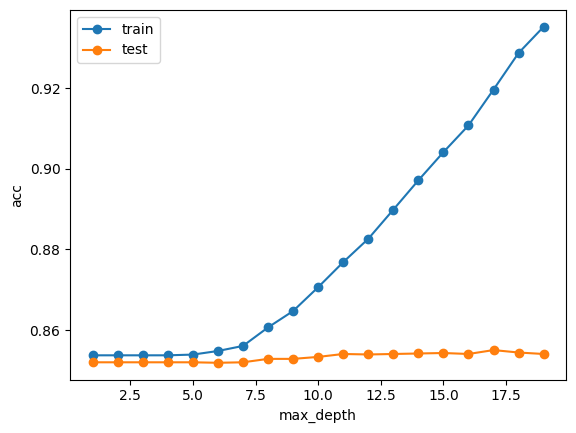

In [112]:
"""
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
train_score=[]
test_score=[]
values=[i for i in range(1,20)]
for i in range(1,20):
  model=RandomForestClassifier(n_estimators=100,max_depth=i,max_features='auto',random_state=None,criterion="gini")
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  acc1=accuracy_score(y_pred,y_test)
  y1_pred=model.predict(x_train)
  acc=accuracy_score(y1_pred,y_train) 
  train_score.append(acc)
  test_score.append(acc1) 
plt.plot(values,train_score,'-o',label="train")
plt.plot(values,test_score,'-o',label="test")
plt.xlabel("max_depth")
plt.ylabel("acc")
plt.legend()
plt.show()
"""

In [ ]:
# from the above graph we can conclude that after max_depth= 7 it is getting overfit

In [274]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=150,max_depth=7,max_features='auto',criterion='entropy')
model.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(criterion='entropy', max_depth=7, max_features='auto',
                       n_estimators=150)

In [278]:
print(len(X_resampled.columns))
print(len(final_dataframe1.columns))
if(len(X_resampled.columns)==len(final_dataframe1.columns)):
  print("same columns")
else:
  print("variable columns")

3596
3596
same columns


In [279]:
y_pred1=model.predict(final_dataframe1)

In [280]:
y_pred1

array([1, 1, 0, ..., 1, 0, 0])

In [281]:
columns2=['predicted']

In [282]:
final_dd=pd.DataFrame(y_pred1.reshape(-1,1),columns=columns2)

In [283]:
final_dd['predicted'].unique()

array([1, 0])

In [290]:
ccc=model.predict_proba(final_dataframe1)
l=[]
for i in range(0,5000):
  l.append(ccc[i][1])

In [291]:
ccc

array([[0.49409832, 0.50590168],
       [0.48802748, 0.51197252],
       [0.51320775, 0.48679225],
       ...,
       [0.38877625, 0.61122375],
       [0.79460197, 0.20539803],
       [0.55506673, 0.44493327]])

In [292]:
final_dd['predicted_probability']=l

In [293]:
final_dd.head()

,predicted,predicted_probability
0,1,0.505902
1,1,0.511973
2,0,0.486792
3,1,0.585495
4,0,0.440061


In [294]:
final_dd.to_csv('/content/drive/MyDrive/fibe hackathon/dataset/sub.csv', index=False)